## Monte Carlo Simulation

Monte Carlo Simulation gives us the method for determining the chances of some event
for example chances of coin flipping with the finete number of uniformly random samples.
We will use Peudo-random number generators to find the approximation of PI.

For this we will use the PI constant of the Julia programming lenguage and basic math as well as pseudo-random number generator.

#### Imports

In [1]:
using Plots
using Random
using Statistics
using Distributions

In [3]:
function give_sample(n=1, from=0, to=9)
    return rand(Uniform(from, to), n)
end

function give_sample(n=1, from_to::Tuple=(0,9))
    return rand(Uniform(from_to[1], from_to[2]), n)
end

plane = Vector{Vector{Float64}}()

function pi_search(plane::Vector{Vector{Float64}}, number_of_samples::Int=100, sampling::Int=10, from_to::Tuple=(0, 9))
    # We are generating *number_of_samples* number of coordinates and
    # store them in th *plane*
    for i = 1:number_of_samples
        push!(plane, give_sample(2, from_to))
    end
end

function pi_search(number_of_samples::Int=1000, from_to::Tuple=(0,10))
    plane_x = Vector{Float64}()
    plane_y = Vector{Float64}()
    # We are generating *number_of_samples* number of coordinates and
    # store them in th *plane*
    for i = 1:number_of_samples
        append!(plane_x, give_sample(1, from_to))
        append!(plane_y, give_sample(1, from_to))
    end
    plane = [plane_x, plane_y]
    return plane
end

plane = pi_search()


2-element Vector{Vector{Float64}}:
 [9.214746552591354, 6.174308803403696, 2.1088627089569023, 8.057573016499921, 3.2257779570247402, 1.5914856292403856, 4.053356003458138, 3.1410902046401867, 0.665631092355603, 7.337117743285444  …  8.229240045614326, 8.63111493691795, 1.382086905678177, 2.8960256050698896, 2.5313149651845435, 7.528079058417623, 5.180169165553421, 3.8429772802948814, 5.894602365455633, 8.879225671428143]
 [9.66394437496103, 9.754514924091195, 3.02765308544213, 5.005604306279561, 7.1627731972580815, 3.9169428374391657, 1.458398002950747, 9.889027005718319, 5.9860103100649065, 2.7002164337279977  …  6.773420305741906, 5.4946998928232915, 0.3454535381096613, 0.06399063109665981, 9.301420087979828, 1.8615566513035686, 1.5502383159289956, 9.996970562326446, 1.2493646838351768, 4.207591518231981]

In [4]:
# Custom type for Circle. Keeping it orginized
struct Circle
    x::Float64
    y::Float64
    r::Float16
end

# Custom type for Square
struct Square
    x::Float64
    y::Float64
    a::Float16
end

# Function for checking if ball falls inside the circle
function is_inside(circle::Circle, x, y)
    return sqrt((circle.x - x)^2 + (circle.y - y)^2) < abs(circle.r)
end

function is_inside(square::Square, x, y)
    square_r = square.a/2

    if x > square.x - square_r && y > square.y - square_r
        
        if y < square.y + square_r && x < square.x + square_r
            return true
        else
            return false
        end
    else 
        return false
    end
end

function square_cords(square::Square)
    square_r = square.a/2

    x = [
        [square.x - square_r, square.x - square_r, square.x + square_r, square.x + square_r, square.x - square_r],
        [square.y - square_r, square.y + square_r, square.y + square_r, square.y - square_r, square.y - square_r]
    ]
    show(x)
    return x
end

our_circle = Circle(6, 6, 3)
our_square = Square(2.5, 2.5, 1)
println(is_inside(our_square, 3.0, 2.01))
println(is_inside(our_circle, 6, 6))

false
true


## Create the enviroment

### Plane

Simple Cartesian plane from 0 to 9.

### Square

Depending on the positions of the corners with side length equal to **a**.

### Circle

Depending on the center of the circle and  the formula of the circle in the coordinate system with diagonal equal to **a**.


Now we will visualize the prcoess with the example code

[[2.25, 2.25, 6.75, 6.75, 2.25], [2.25, 6.75, 6.75, 2.25, 2.25]][[2.25, 2.25, 6.75, 6.75, 2.25], [2.25, 6.75, 6.75, 2.25, 2.25]]

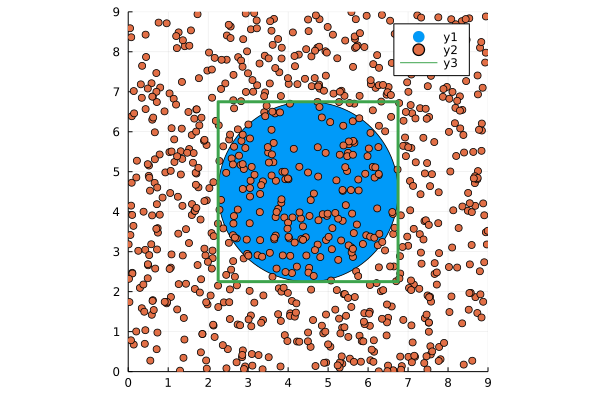

In [13]:
our_circle = Circle(4.5,4.5,4.5)
our_square = Square(4.5,4.5,4.5)

# Initiating the plotting surface
plot(xlims=(0,9), ylims=(0,9), xticks=0:9, yticks=0:9, aspectratio=1)

# Create and draw our circle
scatter!( (our_circle.x, our_circle.y), shape=:circle, markersize=22.25*our_circle.r )

# Scatter the points
scatter!(plane[1], plane[2])

# Create and draw the square
plot!( square_cords(our_square)[1], square_cords(our_square)[2], lw=3 )

plot!()

### Calculating the PI

Basing on our simulation we can caclculate the value of PI by chcecking the number of samples inside the circle and samples inside of the square.

The division of number of samples inside the circle by the number of samples inside the square will give us approximation of the number of PI.

In [33]:
our_circle = Circle(4.5, 4.5, 4.5)
our_square = Square(4.5, 4.5, 4.5)

samples_circle = 0
samples_square = 0

NUMBER_OF_SAMPLES = 1000000
samples = pi_search(NUMBER_OF_SAMPLES, (0, 10))

for i = 1:NUMBER_OF_SAMPLES
    if i%100000 == 0
        samples = pi_search(NUMBER_OF_SAMPLES, (0, 10))
    end
    if is_inside(our_circle, samples[1][i], samples[2][i])
        samples_circle += 1
    end
    if is_inside(our_square, samples[1][i], samples[2][i])
        samples_square += 1
    end
end

In [34]:
println(samples_circle/samples_square)

3.1414230284457405
